
# Maching Learning Project - Assignment 06
## CAUCSE senior 20151145 Kim Jekyun
## Supervised classification - improving capacity learning
<hr>

# Computing Area
## 0. Import library
<hr>
Import library

In [31]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math

## 1. Load and plot the dataset
<hr>

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MachineLearningProject/06/training.txt', delimiter=',')
data_test   = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MachineLearningProject/06/testing.txt', delimiter=',')

# number of training data
num_train   = data_train.shape[0] 
num_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0].astype(np.float64) # feature 1
x2_train            = data_train[:,1].astype(np.float64) # feature 2
idx_train           = data_train[:,2].astype(np.float64) # label
x1_idx0_train       = x1_train[idx_train==0] # index of class0
x1_idx1_train       = x1_train[idx_train==1] # index of class1
x2_idx0_train       = x2_train[idx_train==0] 
x2_idx1_train       = x2_train[idx_train==1] 

# testing data
x1_test             = data_test[:,0].astype(np.float64) # feature 1
x2_test             = data_test[:,1].astype(np.float64) # feature 2
idx_test            = data_test[:,2].astype(np.float64) # label
x1_idx0_test       = x1_test[idx_test==0] # index of class0
x1_idx1_test       = x1_test[idx_test==1] # index of class1
x2_idx0_test       = x2_test[idx_test==0] 
x2_idx1_test       = x2_test[idx_test==1] 


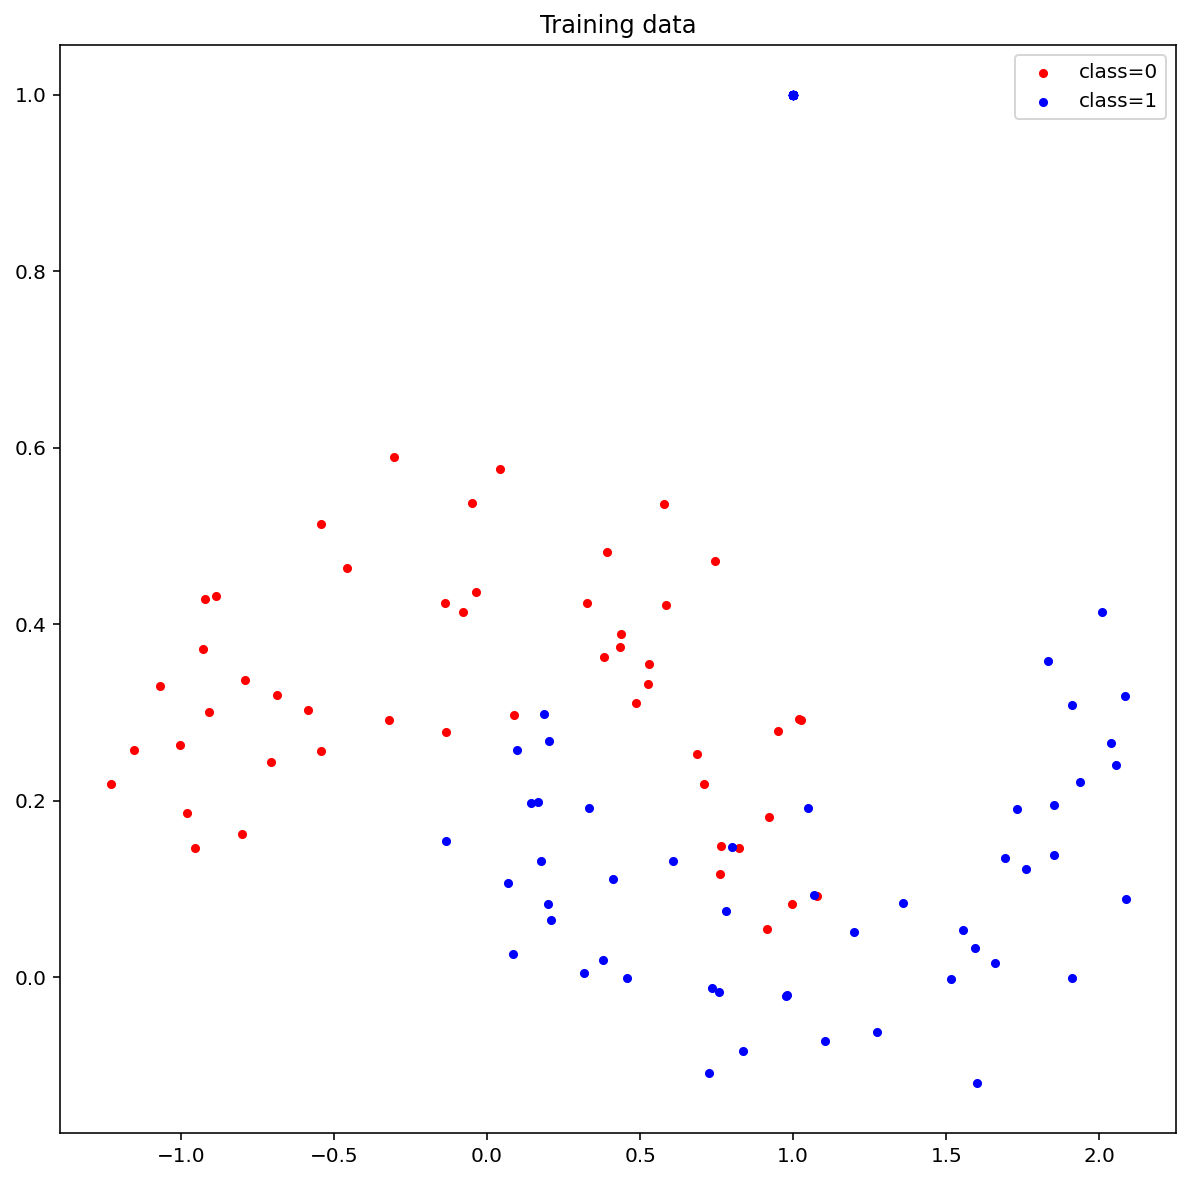

In [33]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0_train, x2_idx0_train , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1_train, x2_idx1_train , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

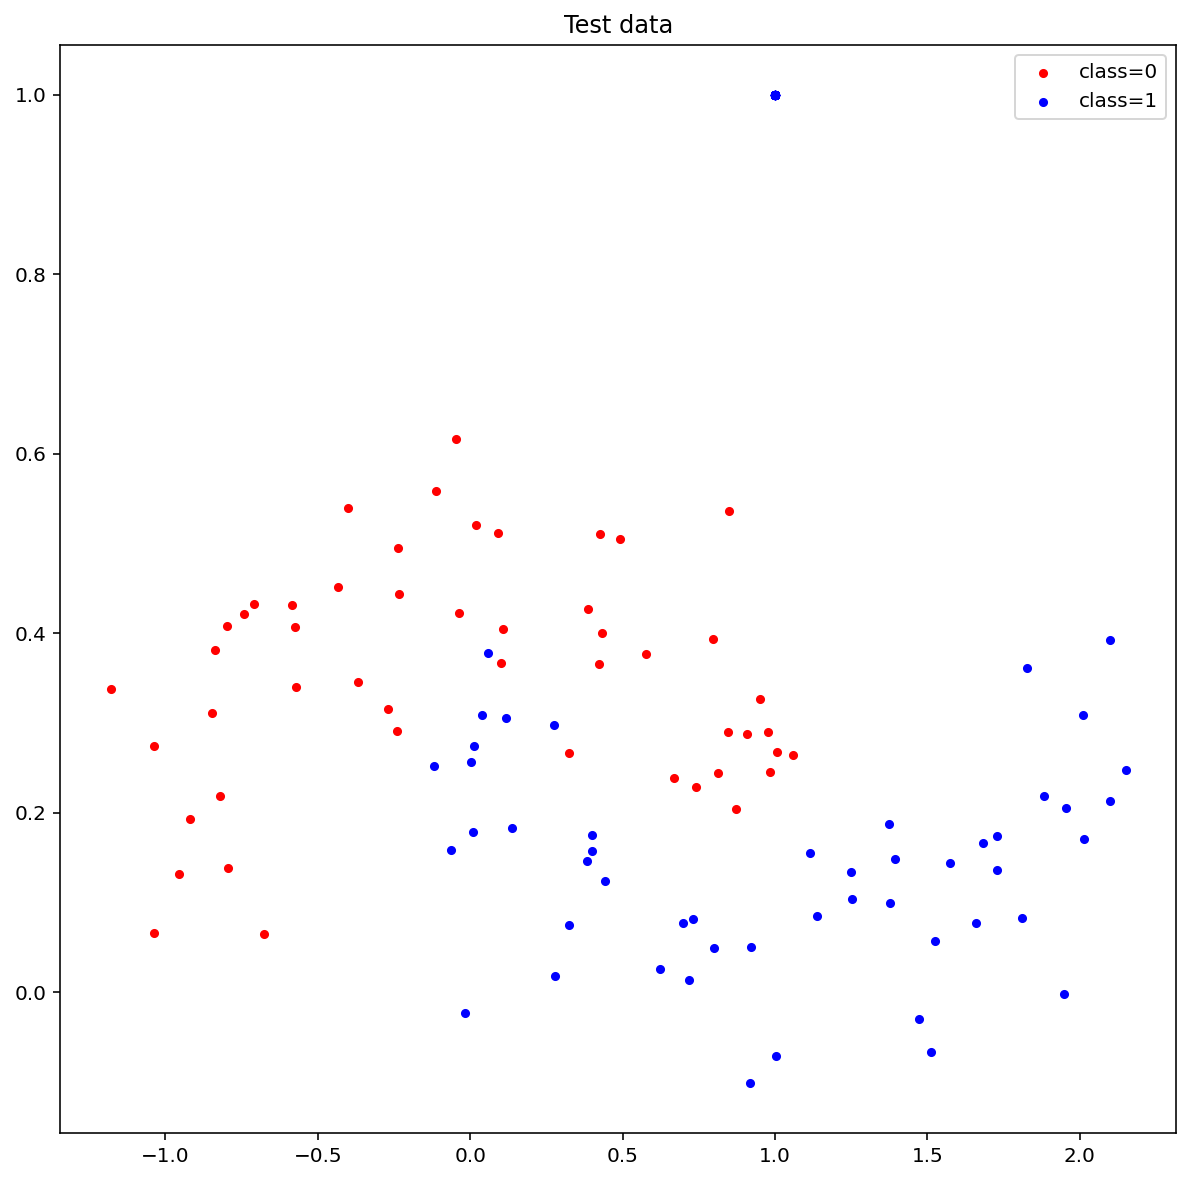

In [34]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0_test, x2_idx0_test, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1_test, x2_idx1_test, s=50, c='b', marker='.', label='class=1')
plt.title('Test data')
plt.legend()
plt.show()

## 2. Define a logistic regression loss function and its gradient
<hr>

In [48]:
# sigmoid function
def sigmoid(z):
    try:
        return 1 / (1 + np.exp(-z))
    except OverflowError:
        return 1e-9

# predictive function definition
def f_pred(X,w):
    p = np.dot(X,w)    
    return p

# construct the data matrix X, and label vector y
def poly(X1, X2, degree):
    func = np.ones(len(X1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            func = np.column_stack((func, (X1**(i-j)) * (X2**j)))
    return func

# loss function definition
def loss_logreg(y_pred,y,lambdas,w):     
    n = len(y)
    #loss = (np.dot((sigmoid(y_pred) - y).T, (sigmoid(y_pred) - y))) / n
    loss = -(np.dot(y.T, np.log(sigmoid(y_pred+1e-9))) + np.dot((1-y).T, np.log(1-sigmoid(y_pred+1e-9)))) / n + lambdas*np.sum(w**2) / 2
    return loss

# gradient function definition
def grad_loss(y_pred, y, X):
    n = len(y)
    #grad = 2 * np.dot(X.T, np.dot((sigmoid(y_pred)-y), np.dot(sigmoid(y_pred).T, (1-sigmoid(y_pred))))) / len(y_pred)
    grad = 2 * np.dot(X.T, (sigmoid(y_pred+1e-9) - y)) / n
    return grad

# gradient descent function definition
def grad_desc(X, y , w1_init, w2_init, w3_init, w4_init, w5_init, tau, max_iter, ld1, ld2, ld3, ld4, ld5):

    L_iters = np.zeros([max_iter*5]).reshape(5,max_iter) # record the loss values
    w1 = w1_init # initialization
    w2 = w2_init # initialization
    w3 = w3_init # initialization
    w4 = w4_init # initialization
    w5 = w5_init # initialization

    for i in range(max_iter): # loop over the iterations

        y1_pred = f_pred(X,w1) # linear p_redicition function  
        grad_f = grad_loss(y1_pred,y,X) # gradient of the loss 
        w1 = (1 - tau)*w1 - tau* grad_f # update rule of gradient descent
        y2_pred = f_pred(X,w2) # linear predicition function  
        grad_f = grad_loss(y2_pred,y,X) # gradient of the loss 
        w2 = (1 - tau)*w2 - tau* grad_f # update rule of gradient descent
        y3_pred = f_pred(X,w3) # linear predicition function  
        grad_f = grad_loss(y3_pred,y,X) # gradient of the loss 
        w3 = (1 - tau)*w3 - tau* grad_f # update rule of gradient descent
        y4_pred = f_pred(X,w4) # linear predicition function  
        grad_f = grad_loss(y4_pred,y,X) # gradient of the loss 
        w4 = (1 - tau)*w4 - tau* grad_f # update rule of gradient descent
        y5_pred = f_pred(X,w5) # linear predicition function  
        grad_f = grad_loss(y5_pred,y,X) # gradient of the loss 
        w5 = (1 - tau)*w5 - tau* grad_f # update rule of gradient descent

        L_iters[0][i] = loss_logreg(y1_pred,y,ld1,w1) # save the current loss value 
        L_iters[1][i] = loss_logreg(y2_pred,y,ld2,w2) # save the current loss value 
        L_iters[2][i] = loss_logreg(y3_pred,y,ld3,w3) # save the current loss value 
        L_iters[3][i] = loss_logreg(y4_pred,y,ld4,w4) # save the current loss value 
        L_iters[4][i] = loss_logreg(y5_pred,y,ld5,w5) # save the current loss value 
        
    return w1,w2,w3,w4,w5, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>


In [63]:

n = data_train.shape[0]
X = poly(x1_train, x2_train, 10)
y = data_train[:,2][:,None] # label
print(y.shape)

# run gradient descent algorithm
start = time.time()
w1_init = np.full((X.shape[1], 1), 0).astype('float64')
w2_init = np.full((X.shape[1], 1), 0).astype('float64')
w3_init = np.full((X.shape[1], 1), 0).astype('float64')
w4_init = np.full((X.shape[1], 1), 0).astype('float64')
w5_init = np.full((X.shape[1], 1), 0).astype('float64')
tau = 0.000005; max_iter = 500000
ld1, ld2, ld3, ld4, ld5 = 0.00001, 0.0001, 0.001, 0.01, 0.1
w1,w2,w3,w4,w5, L_iters = grad_desc(X,y,w1_init,w2_init,w3_init,w4_init,w5_init,tau,max_iter,ld1,ld2,ld3,ld4,ld5)
print('Time=',time.time() - start)

(200, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


Time= 383.6904184818268


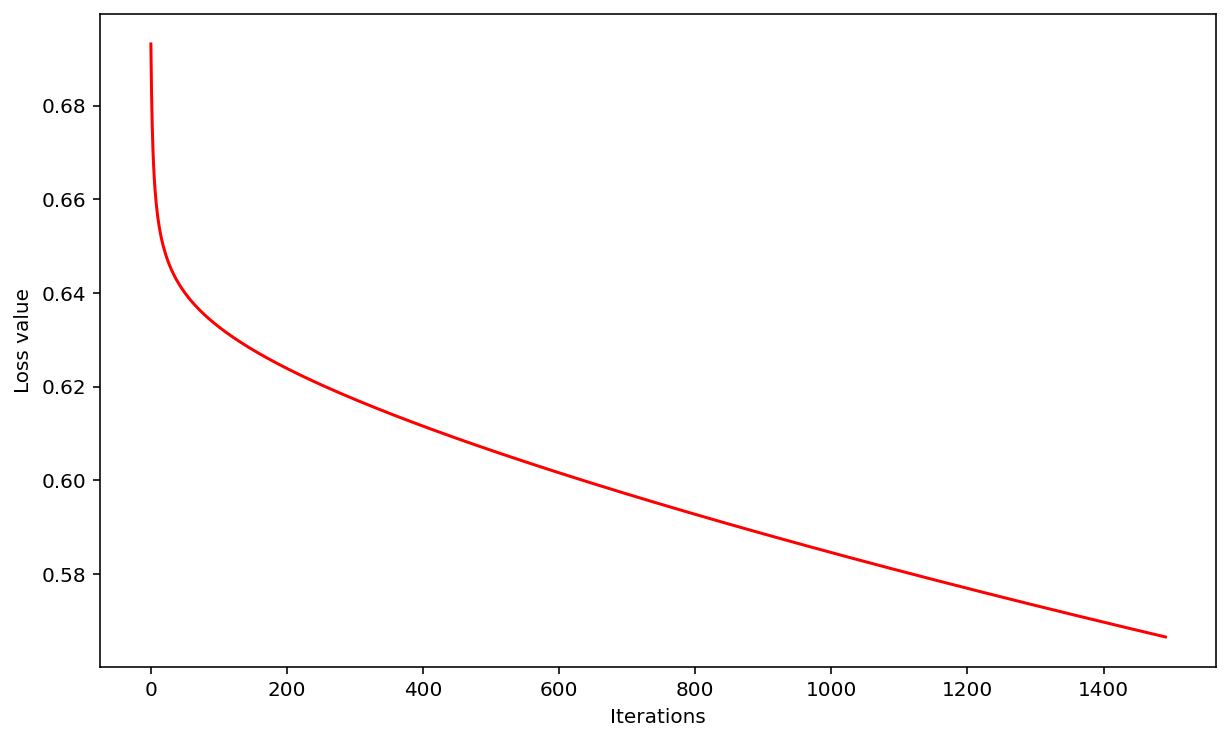

In [65]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[0], c='red')
#plt.plot(np.array(range(max_iter)), L_iters[1])
#plt.plot(np.array(range(max_iter)), L_iters[2])
#plt.plot(np.array(range(max_iter)), L_iters[3])
#plt.plot(np.array(range(max_iter)), L_iters[4])
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

In [55]:
def boundary(x1_0, x2_0, x1_1, x2_1, w, degree):
    plt.figure(figsize=(12, 10))
    plt.scatter(x1_0, x2_0, s=50, c='r', marker='.', label='Class0')
    plt.scatter(x1_1, x2_1, s=50, c='b', marker='.', label='Class1')

    X = np.linspace(-2, 3, 100)
    Y = np.linspace(-2, 2, 100)
    XX, YY = np.meshgrid(X,Y)
    XX = np.ravel(XX)
    YY = np.ravel(YY)

    Z = np.zeros((len(X)*len(Y)))
    poly_line = poly(XX, YY, degree)
    Z = poly_line.dot(w)
  
    XX = XX.reshape((len(X), len(Y)))
    YY = YY.reshape((len(X), len(Y)))
    Z = Z.reshape((len(X), len(Y)))
    plt.contour(XX, YY, Z, levels=[0], colors='k')
    plt.legend()
    plt.show()

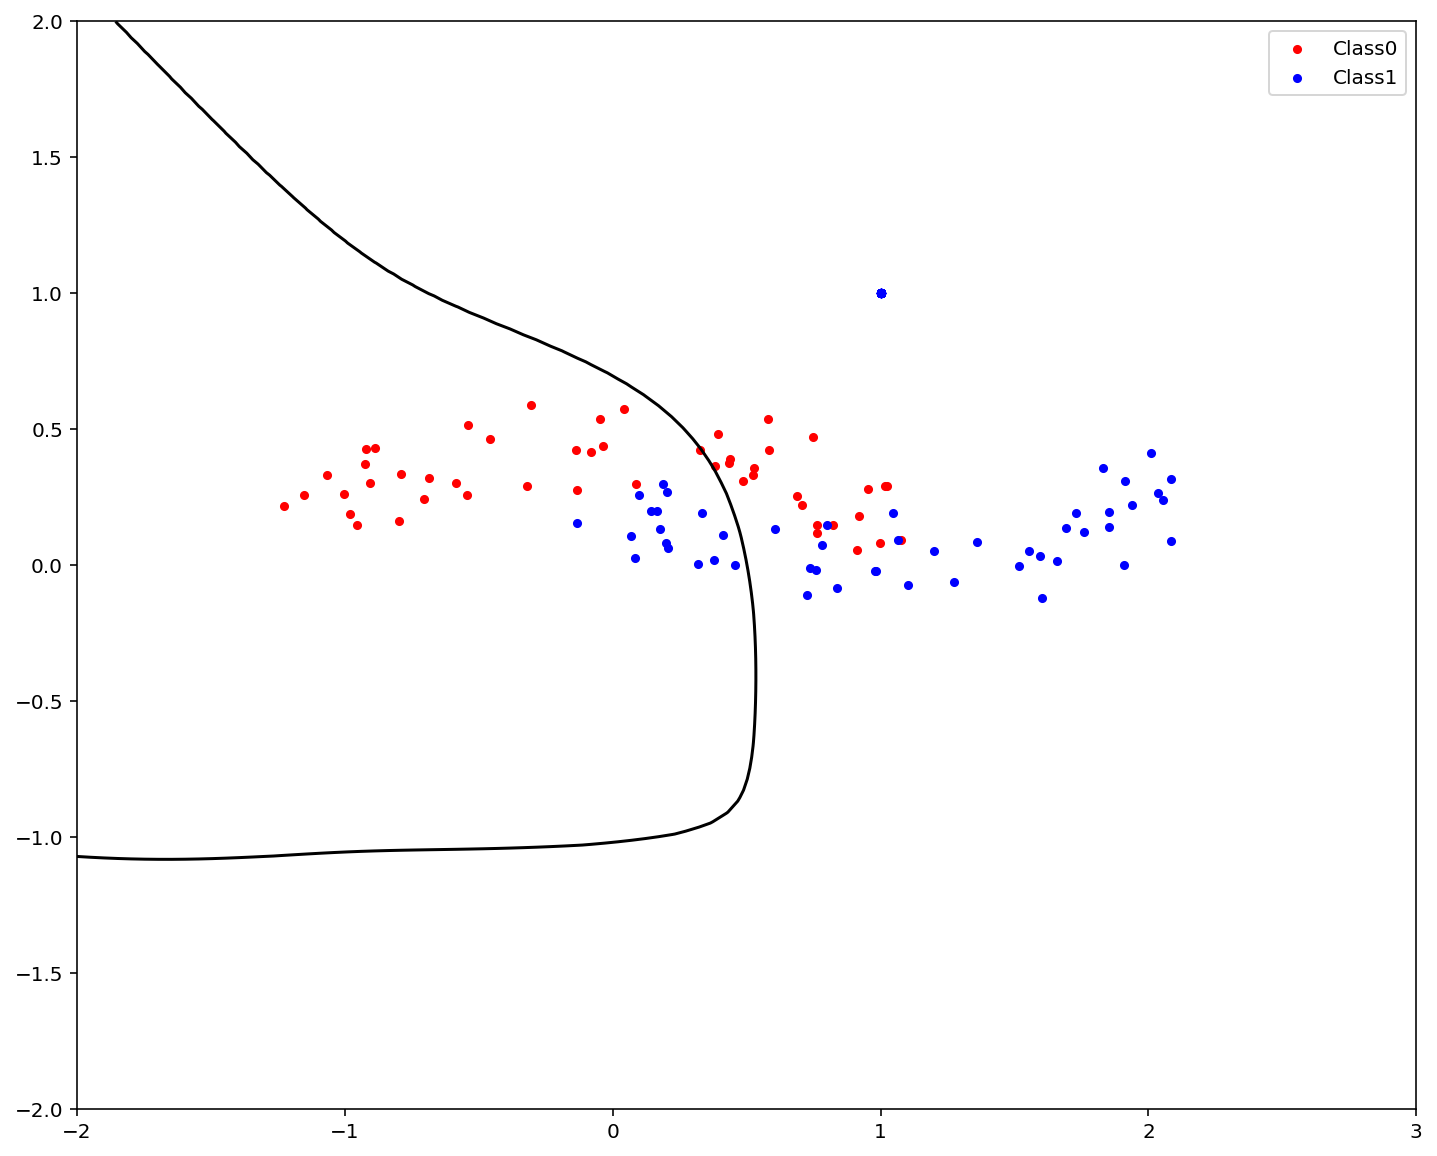

In [56]:
boundary(x1_idx0_train, x2_idx0_train, x1_idx1_train, x2_idx1_train, w1, 10)

## 5. Plot the probability map
<hr>

In [73]:
def boundary_map(x1_0_tr, x2_0_tr, x1_1_tr, x2_1_tr, x1_0_te, x2_0_te, x1_1_te, x2_1_te, w, degree):
    fig = plt.figure(4, figsize=(24, 8))

    X = np.linspace(-2, 3, 100)
    Y = np.linspace(-2, 2, 100)
    XX, YY = np.meshgrid(X,Y)
    XX = np.ravel(XX)
    YY = np.ravel(YY)

    Z = np.zeros((len(X)*len(Y)))
    poly_line = poly(XX, YY, degree)
    Z = poly_line.dot(w)
  
    XX = XX.reshape((len(X), len(Y)))
    YY = YY.reshape((len(X), len(Y)))
    Z = Z.reshape((len(X), len(Y)))

    fig.add_subplot(121)
    ax = plt.contourf(XX,YY,Z,2500,vmin=-2,vmax=2,cmap='coolwarm',alpha=0.3,extend='both')
    cbar = plt.colorbar(ax)
    cbar.update_ticks()

    plt.scatter(x1_0_tr, x2_0_tr, s=50, c='r', marker='.', label='Class=0')
    plt.scatter(x1_1_tr, x2_1_tr, s=50, c='b', marker='.', label='Class=1')
    plt.contour(XX, YY, Z, levels=[0], colors='k')
    plt.legend()
    plt.title('Decision Boundary (Train)')

    fig.add_subplot(122)
    ax = plt.contourf(XX,YY,Z,2500,vmin=-2,vmax=2,cmap='coolwarm',alpha=0.3,extend='both')
    cbar = plt.colorbar(ax)
    cbar.update_ticks()

    plt.scatter(x1_0_te, x2_0_te, s=50, c='r', marker='.', label='Class=0')
    plt.scatter(x1_1_te, x2_1_te, s=50, c='b', marker='.', label='Class=1')
    plt.contour(XX, YY, Z, levels=[0], colors='k')
    plt.legend()
    plt.title('Decision Boundary (Test)')

    plt.show()

In [71]:
boundary_map(x1_idx0_train, x2_idx0_train, x1_idx1_train, x2_idx1_train, x1_idx0_test, x2_idx0_test, x1_idx1_test, x2_idx1_test, w1, 10)

Output hidden; open in https://colab.research.google.com to view.

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [60]:
'''
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:,0].astype(np.float64) # feature 1
x2 = data[:,1].astype(np.float64) # feature 2
'''

X = poly(x1_train, x2_train, 10)
y = data_train[:,2][:,None] # label
p = f_pred(X,w1)


tmp = []
for i, j in zip(p, y):
    if np.round(sigmoid(i)) == j:
        tmp.append(1)

print('total number of data = {}'.format(n))
print('total number of correctly classified data = ', len(tmp))
print('accuracy(%) = ',  100*len(tmp) / len(data_train))

total number of data = 200
total number of correctly classified data =  162
accuracy(%) =  81.0


# Output Area
<hr>

## 1. Plot the training data [0.5pt]
<ht>

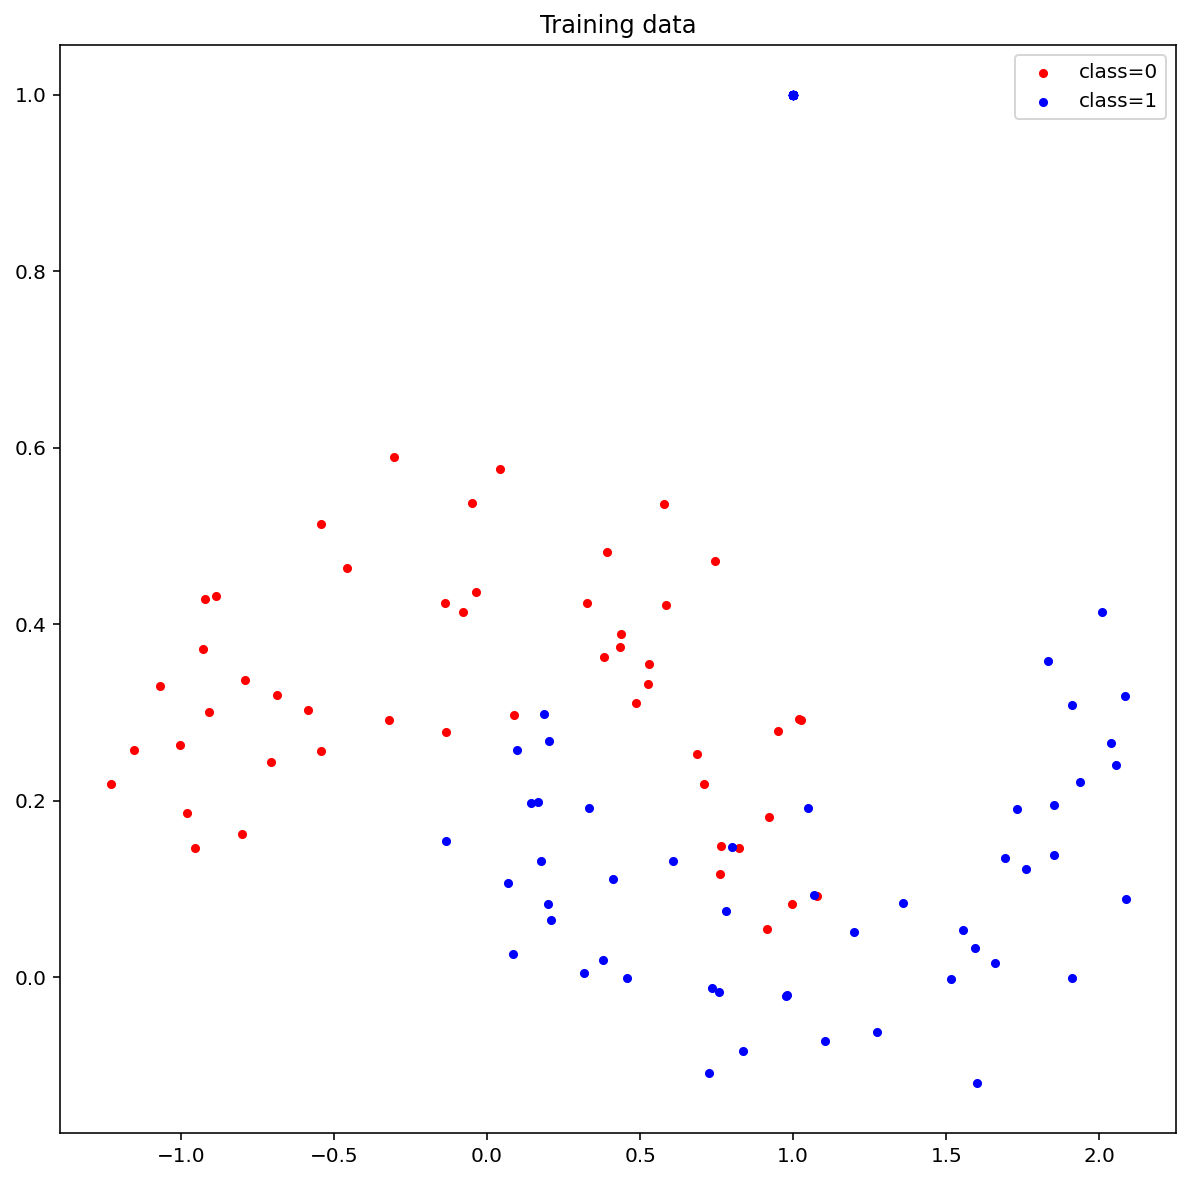

In [7]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0_train, x2_idx0_train , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1_train, x2_idx1_train , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the testing data [0.5pt]
<ht>

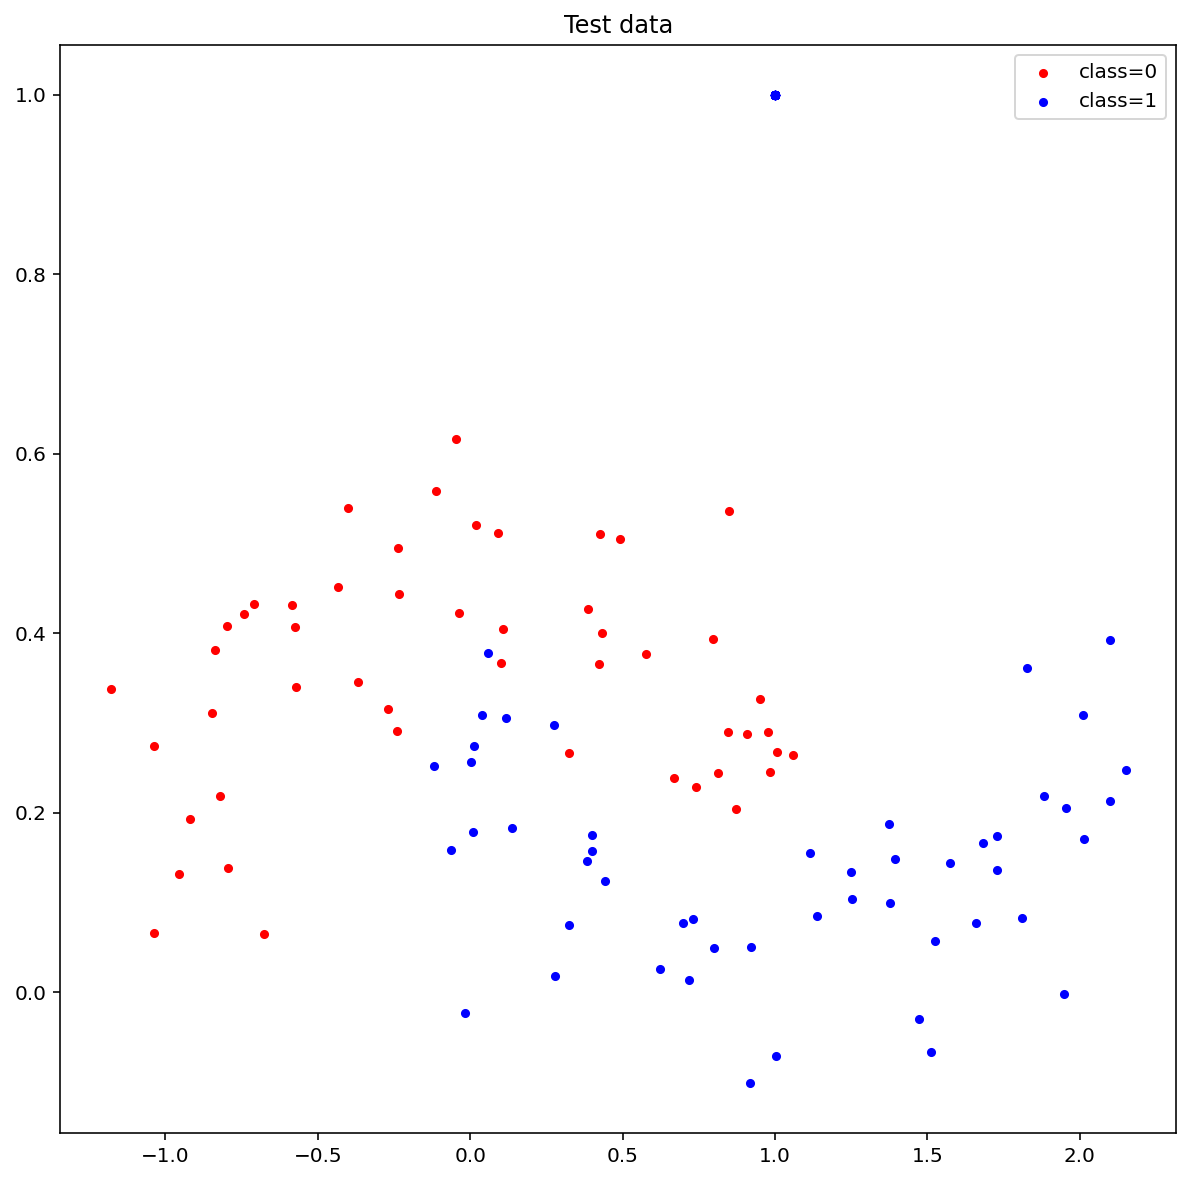

In [8]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0_test, x2_idx0_test, s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1_test, x2_idx1_test, s=50, c='b', marker='.', label='class=1')
plt.title('Test data')
plt.legend()
plt.show()

## 3. Plot the learning curve with λ=0.00001 [1pt]
<hr>

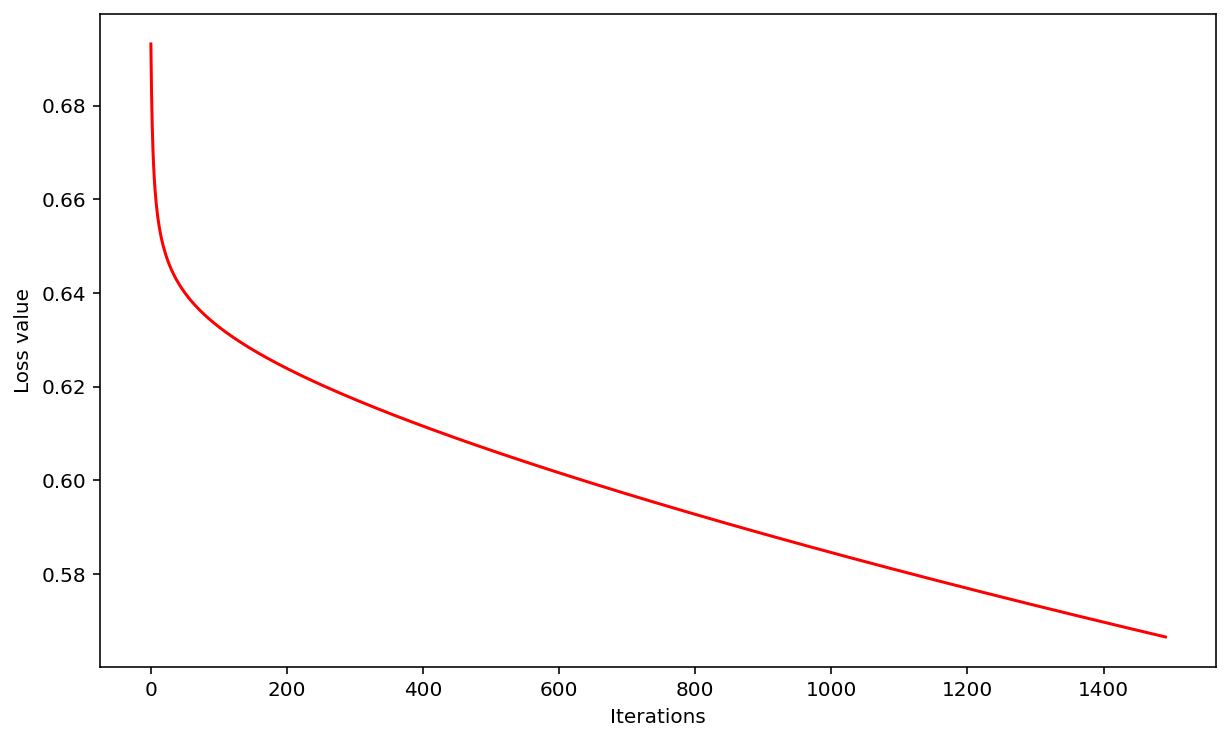

In [74]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[0], c='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the learning curve with λ=0.0001 [1pt]
<hr>

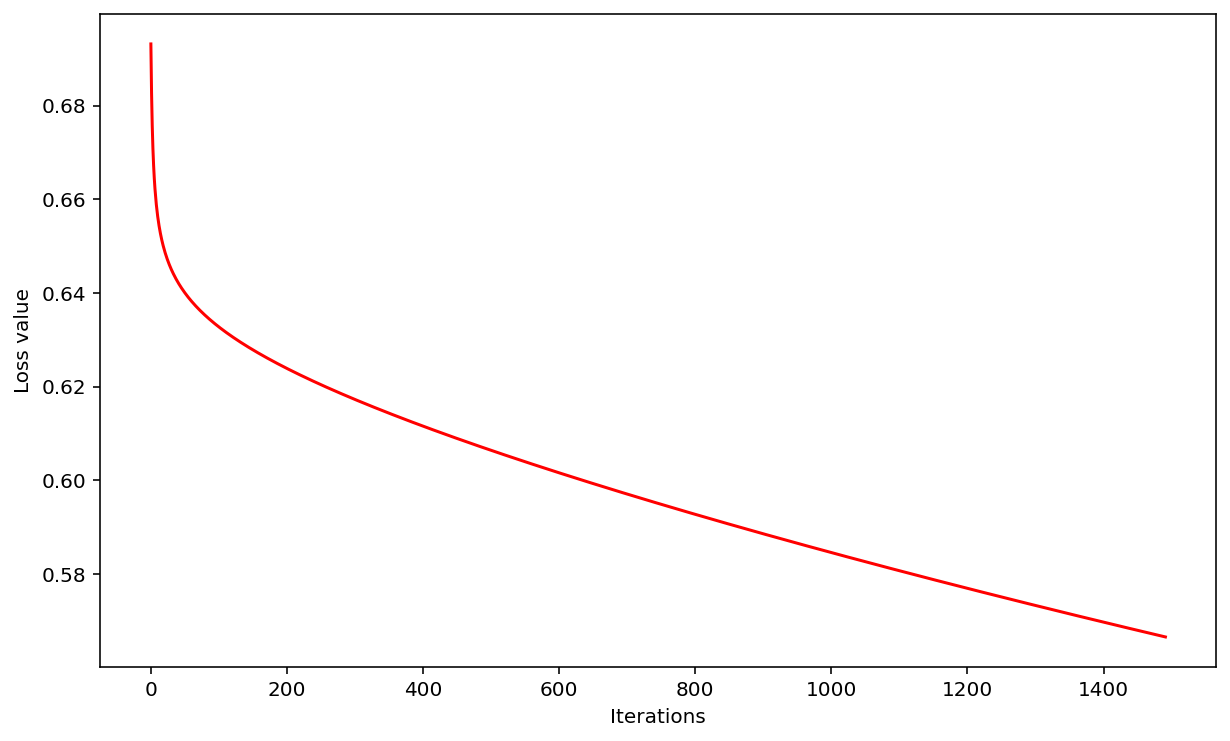

In [75]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[1], c='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 5. Plot the learning curve with λ=0.001 [1pt]
<hr>

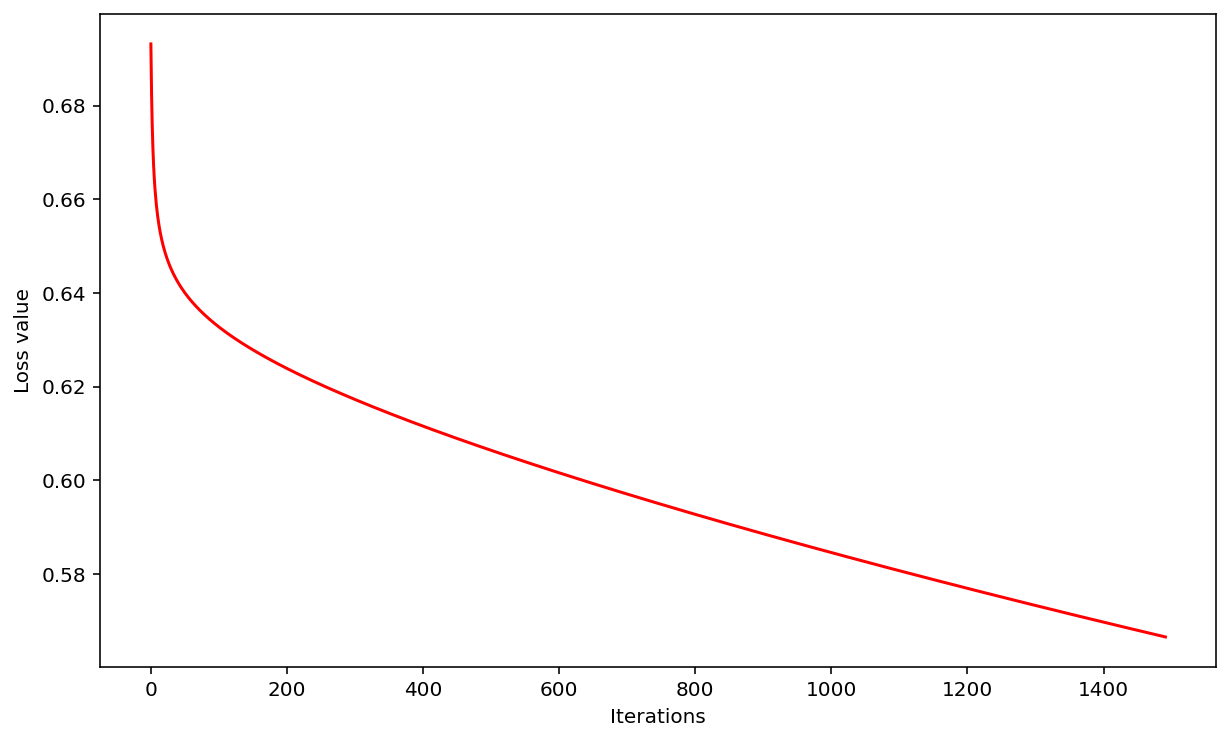

In [76]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[2], c='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 6. Plot the learning curve with λ=0.01 [1pt]
<hr>

In [ ]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[3], c='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 7. Plot the learning curve with λ=0.1 [1pt]
<hr>

In [ ]:
# plot
plt.figure(4, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters[4], c='red')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 8. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

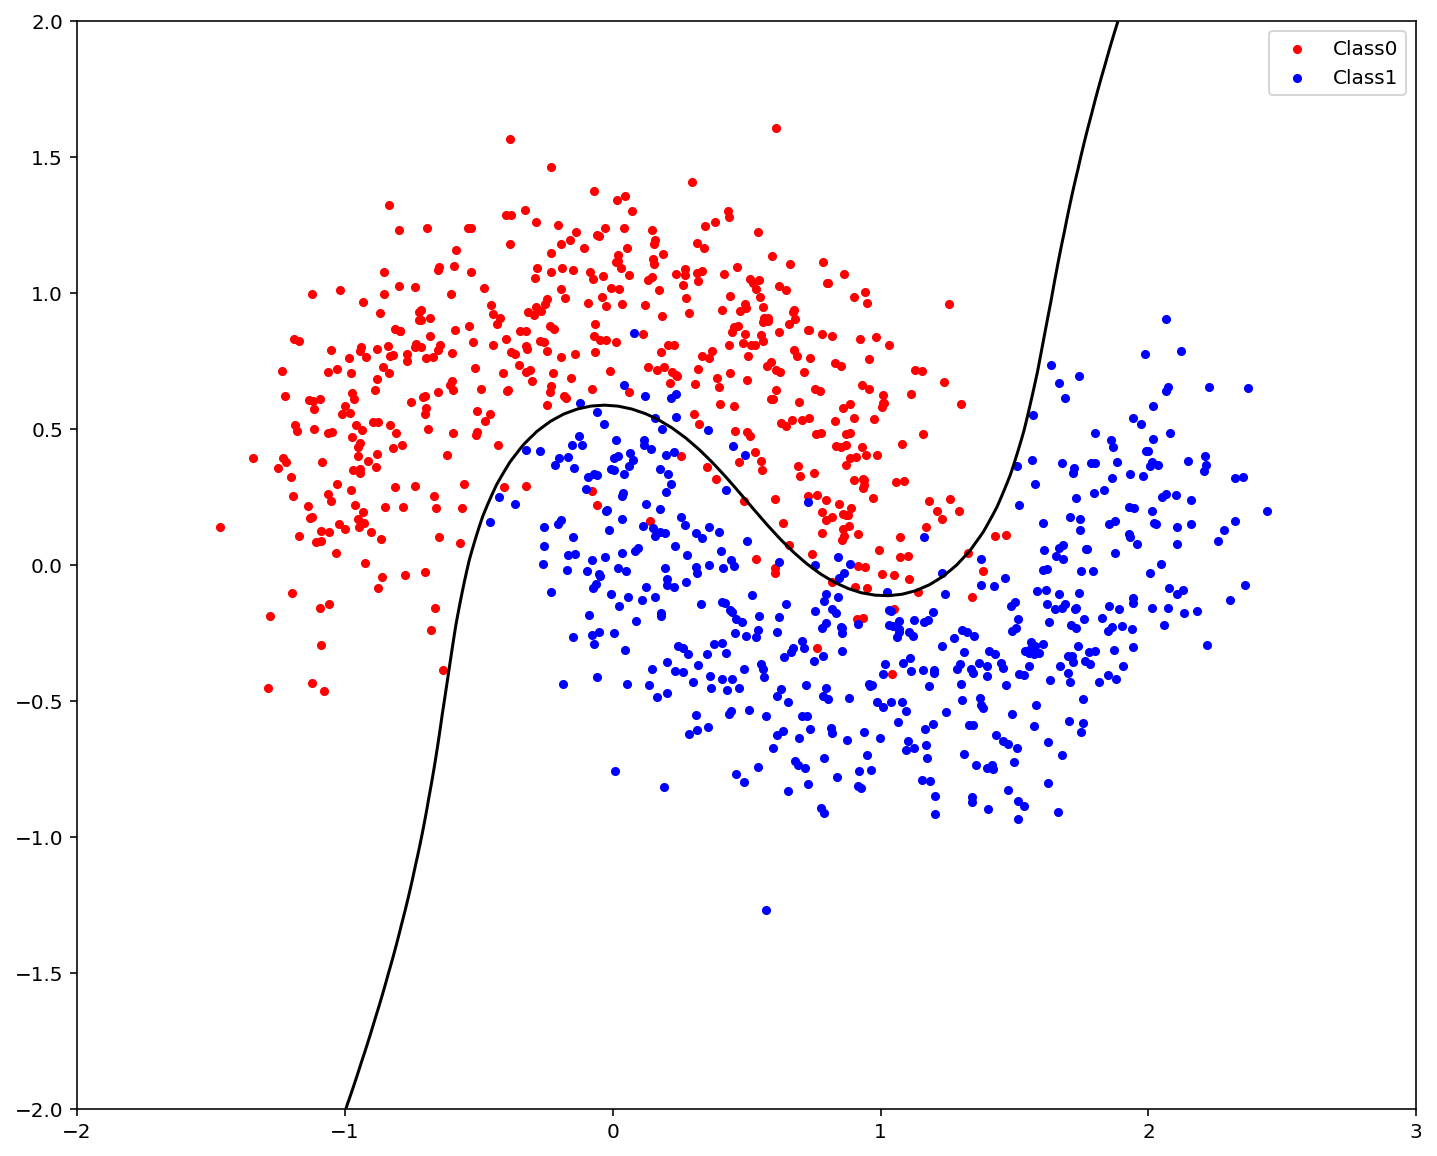

In [ ]:
boundary(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

###  
###  
###  
  

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

In [ ]:
boundary_map(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

Output hidden; open in https://colab.research.google.com to view.

## 5. Compute the classification accuracy [1pt]
<hr>

In [ ]:
print('total number of data = {}'.format(n))
print('total number of correctly classified data = ', len(tmp))
print('accuracy(%) = ',  100*len(tmp) / len(data))

total number of data = 1000
total number of correctly classified data =  957
accuracy(%) =  95.7
